In [35]:
import torch
import numpy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [36]:
n_dim = 2
x_train, y_train = make_blobs(n_samples=80, n_features=n_dim, \
                              centers=[[0,0],[1,1],[1,0],[0,1]], \
                              shuffle=True, cluster_std=0.15)
x_test, y_test = make_blobs(n_samples=20, n_features=n_dim, \
                            centers=[[0,0],[1,1],[1,0],[0,1]], \
                            shuffle=True, cluster_std=0.15)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(80, 2) (80,)
(20, 2) (20,)


In [37]:
def label_map(y_, from_, to_):
    y = numpy.copy(y_)
    for f in from_:
        y[y_ == f] = to_
    return y

y_train = label_map(y_train, [0, 1], 0)
y_train = label_map(y_train, [2, 3], 1)
y_test = label_map(y_test, [0, 1], 0)
y_test = label_map(y_test, [2, 3], 1)

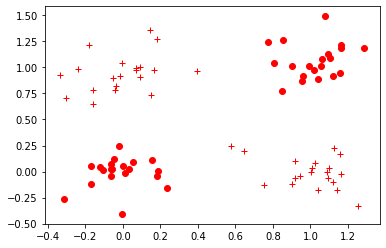

In [38]:
def vis_data(x,y = None, c = 'r'):
    for x_, y_ in zip(x,y):
        plt.plot(x_[0], x_[1], c+'o' if y_ == 0 else c+'+')

plt.figure()
vis_data(x_train, y_train, c='r')
plt.show()

In [39]:
x_train, x_test = torch.FloatTensor(x_train), torch.FloatTensor(x_test)
y_train, y_test = torch.FloatTensor(y_train), torch.FloatTensor(y_test)

In [40]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        
        self.linear_1 = torch.nn.Linear(input_size, hidden_size)
        self.relu = torch.nn.ReLU()
        self.linear_2 = torch.nn.Linear(hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self, input_tensor):
        linear1 = self.linear_1(input_tensor)
        relu = self.relu(linear1)
        
        linear2 = self.linear_2(relu)
        output = self.sigmoid(linear2)
        return output

In [41]:
model = NeuralNet(2, 5)
learning_rate = 0.03
criterion = torch.nn.BCELoss()
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [42]:
model.eval()
test_loss_before = criterion(model(x_test).squeeze(), y_test)
print('Before Training, test loss is {}'.format(test_loss_before.item()))

Before Training, test loss is 0.6942419409751892


In [43]:
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    train_output = model(x_train)
    train_loss = criterion(train_output.squeeze(), y_train)
    if epoch % 100 == 0:
        print('Train loss at {} is {}'.format(epoch, train_loss.item()))
    train_loss.backward()
    optimizer.step()

Train loss at 0 is 0.6960055828094482
Train loss at 100 is 0.6525329351425171
Train loss at 200 is 0.6196308732032776
Train loss at 300 is 0.5863523483276367
Train loss at 400 is 0.5523453950881958
Train loss at 500 is 0.5209685564041138
Train loss at 600 is 0.4922214150428772
Train loss at 700 is 0.4654613435268402
Train loss at 800 is 0.4390893876552582
Train loss at 900 is 0.4113887846469879
Train loss at 1000 is 0.38109228014945984
Train loss at 1100 is 0.34895142912864685
Train loss at 1200 is 0.31652897596359253
Train loss at 1300 is 0.2855077385902405
Train loss at 1400 is 0.25746220350265503
Train loss at 1500 is 0.2326522320508957
Train loss at 1600 is 0.211014986038208
Train loss at 1700 is 0.1923675239086151
Train loss at 1800 is 0.17634466290473938
Train loss at 1900 is 0.16239012777805328


In [44]:
model.eval()
test_loss = criterion(model(x_test).squeeze(), y_test) 
print('After Training, test loss is {}'.format(test_loss.item()))

After Training, test loss is 0.17473459243774414


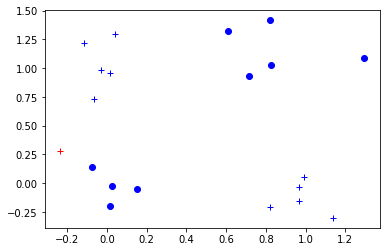

In [55]:
test_output = model(x_test)
pred = test_output.round().view(-1)
correct = pred==y_test

plt.figure()
vis_data(x_test[correct], pred[correct], c='b')
vis_data(x_test[~correct], pred[~correct], c='r')
plt.show()